<a href="https://colab.research.google.com/github/13-aniket/Content-Based-Phishing-Detection/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing basic packages
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading the data
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['urldata1.csv']))
print(dataset)

Saving urldata1.csv to urldata1.csv
                          Domain  Have_IP  Have_At  URL_Length  URL_Depth  \
0               graphicriver.net        0        0           1          1   
1                      ecnavi.jp        0        0           1          1   
2                   hubpages.com        0        0           1          1   
3                extratorrent.cc        0        0           1          3   
4                  icicibank.com        0        0           1          3   
...                          ...      ...      ...         ...        ...   
9995     wvk12-my.sharepoint.com        0        0           1          5   
9996                 adplife.com        0        0           1          4   
9997           kurortnoye.com.ua        0        1           1          3   
9998  norcaltc-my.sharepoint.com        0        0           1          5   
9999       sieck-kuehlsysteme.de        0        1           1          4   

      Redirection  https_Domain  TinyUR

In [4]:
#Checking the shape of the dataset
dataset.shape

(10000, 18)

In [5]:
#Listing the features of the dataset
dataset.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

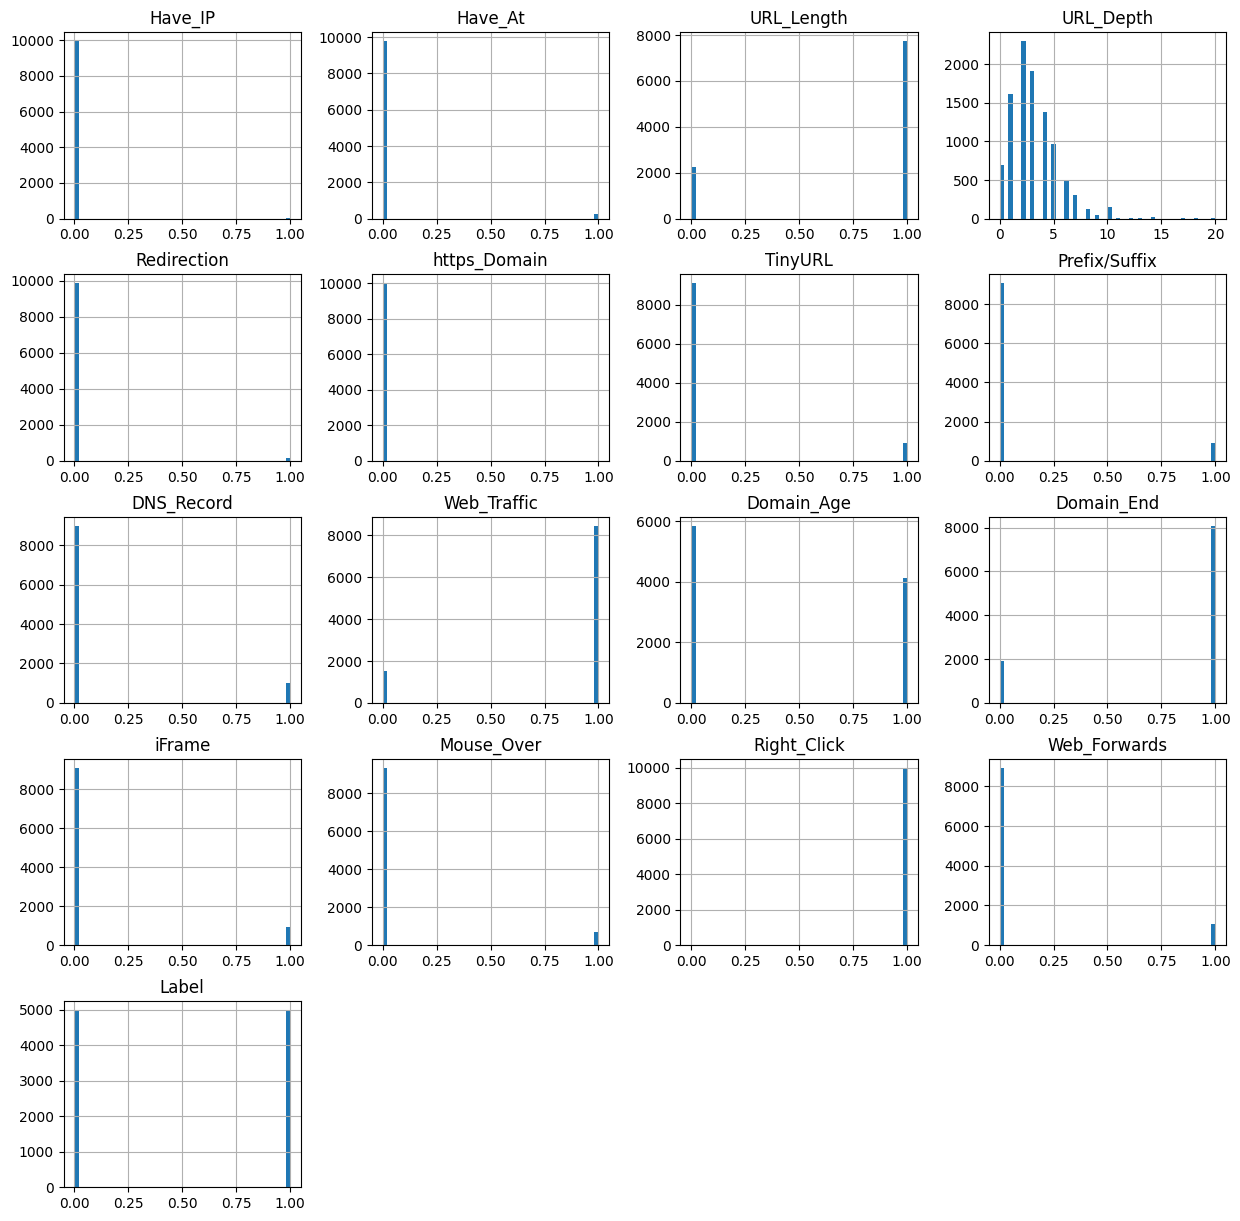

In [7]:
#Plotting the data distribution
dataset.hist(bins = 50,figsize = (15,15))
plt.show()

In [8]:
dataset.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [9]:
#Dropping the Domain column
data = dataset.drop(['Domain'], axis = 1).copy()

In [10]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
1,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0
2,0,0,1,5,0,0,0,0,0,1,1,1,0,0,1,0,0
3,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,1
4,0,0,1,6,0,0,0,0,0,1,1,1,0,0,1,0,0


In [12]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [13]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [14]:
#importing packages
from sklearn.metrics import accuracy_score

In [15]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

**1.Decision Tree Classifier**
Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.



In [26]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [27]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

Performance Evaluation:

In [28]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.815
Decision Tree: Accuracy on test Data: 0.807


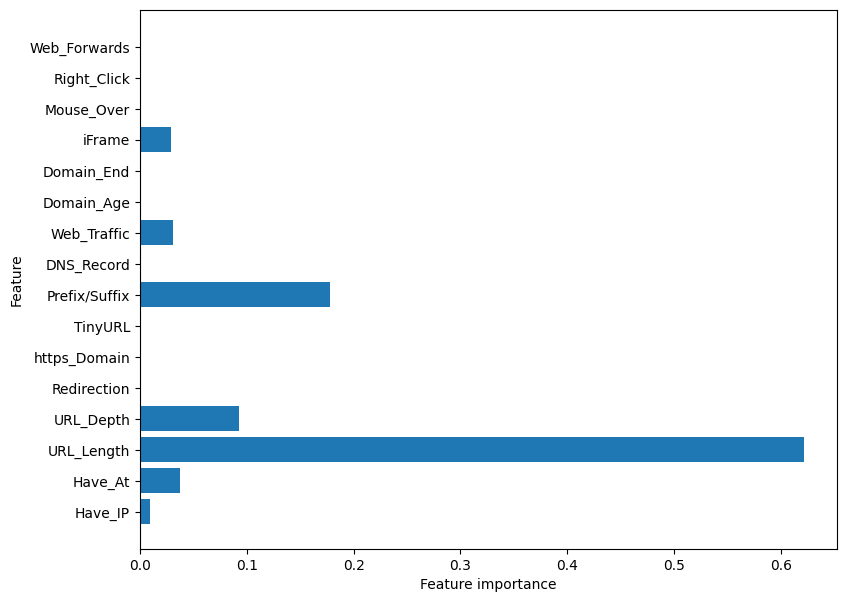

In [29]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [30]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

**2.Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [16]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [17]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [18]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.820
Random forest: Accuracy on test Data: 0.809


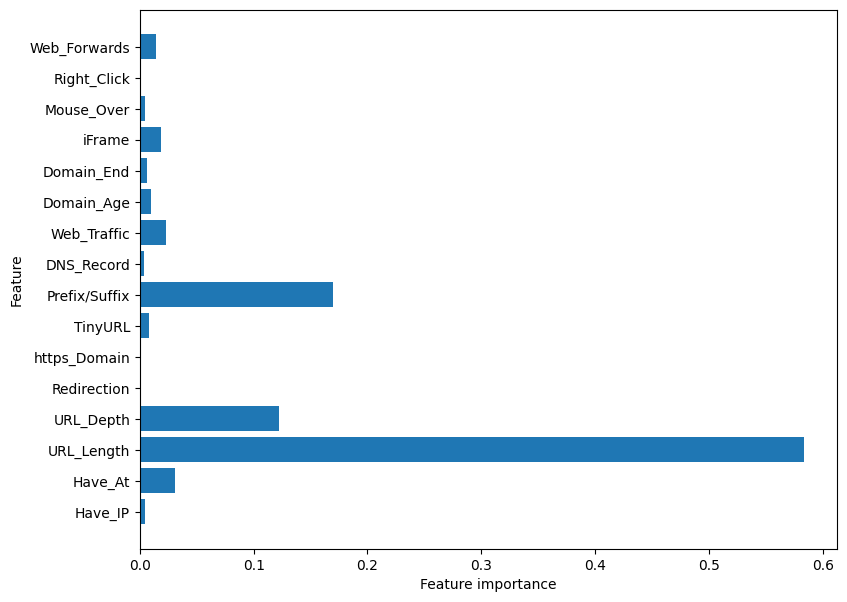

In [19]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [20]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

**3.Support Vector Machines**
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [21]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [22]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [23]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.804
SVM : Accuracy on test Data: 0.795


In [24]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

**Comparision of Models**

In [31]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Random Forest,0.820,0.810
1,SVM,0.804,0.795
2,Decision Tree,0.815,0.808


In [32]:
 import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import re
from datetime import datetime
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Function to extract features from a website
def extract_features(url):
    features = {}

    # Feature: Have_IP
    features['Have_IP'] = 1 if re.search(r'\d+\.\d+\.\d+\.\d+', url) else 0

    # Feature: Have_At
    features['Have_At'] = 1 if '@' in url else 0

    # Feature: URL_Length
    features['URL_Length'] = len(url)

    # Feature: URL_Depth
    features['URL_Depth'] = url.count('/')

    # Make an HTTP request to get the HTML content of the website
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Feature: Redirection
        features['Redirection'] = 1 if response.history else 0

        # Feature: https_Domain
        features['https_Domain'] = 1 if urlparse(url).scheme == 'https' else 0

        # Feature: TinyURL (example check)
        features['TinyURL'] = 1 if 'tinyurl' in url.lower() else 0

        # Feature: Prefix/Suffix
        features['Prefix/Suffix'] = 1 if '-' in url or '_' in url else 0

        # Feature: DNS_Record
        features['DNS_Record'] = 1 if len(soup.find_all('a', href=re.compile('^(http|https)://'))) > 0 else 0

        # Feature: Web_Traffic (example check)
        features['Web_Traffic'] = len(soup.find_all('img'))

        # Feature: Domain_Age (example check)
        # Note: This is a simplified example. Actual domain age calculation may involve more complex methods.
        features['Domain_Age'] = (datetime.now() - datetime(2020, 1, 1)).days

        # Feature: Domain_End
        features['Domain_End'] = 0  # You may need a more sophisticated method to check domain expiration

        # Feature: iFrame
        features['iFrame'] = 1 if soup.find('iframe') else 0

        # Feature: Mouse_Over (example check)
        features['Mouse_Over'] = len(soup.find_all('script', {'onmouseover': True}))

        # Feature: Right_Click (example check)
        features['Right_Click'] = len(soup.find_all('script', {'oncontextmenu': True}))

        # Feature: Web_Forwards
        features['Web_Forwards'] = len(soup.find_all('script', {'onload': True}))

    except Exception as e:
        print(f"Error: {e}")
        return None

    return features

# Function to test a website with a trained model
def test_website(url, model):
    features = extract_features(url)

    if features:
        # Create a DataFrame for the new data point
        new_data = pd.DataFrame(columns=['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
                                         'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
                                         'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
                                         'Right_Click', 'Web_Forwards', 'Label'])

        features['Label'] = 0  # Placeholder label, replace with the actual label if known
        new_data = new_data.append(features, ignore_index=True)

        # Separate features and target variable
        X_new = new_data.drop('Label', axis=1)

        # Make prediction
        prediction = model.predict(X_new)

        return prediction[0]
    else:
        return None

# Load your pre-trained decision tree model
# Example: tree = DecisionTreeClassifier(max_depth=5)
# Load or train your model as needed

# Get user input for URL
user_input_url = input("Enter the URL to test: ")

# Test the website with the trained model
result = test_website(user_input_url, tree)

if result is not None:
    if result != 1:
        print(f"The website '{user_input_url}' is predicted to be legitimate.")
else:
    print(f"The website '{user_input_url}' is predicted to be phishing.")


Enter the URL to test: https://google.com
The website 'https://google.com' is predicted to be legitimate.


<ipython-input-32-a83858d8d252>:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(features, ignore_index=True)
